In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

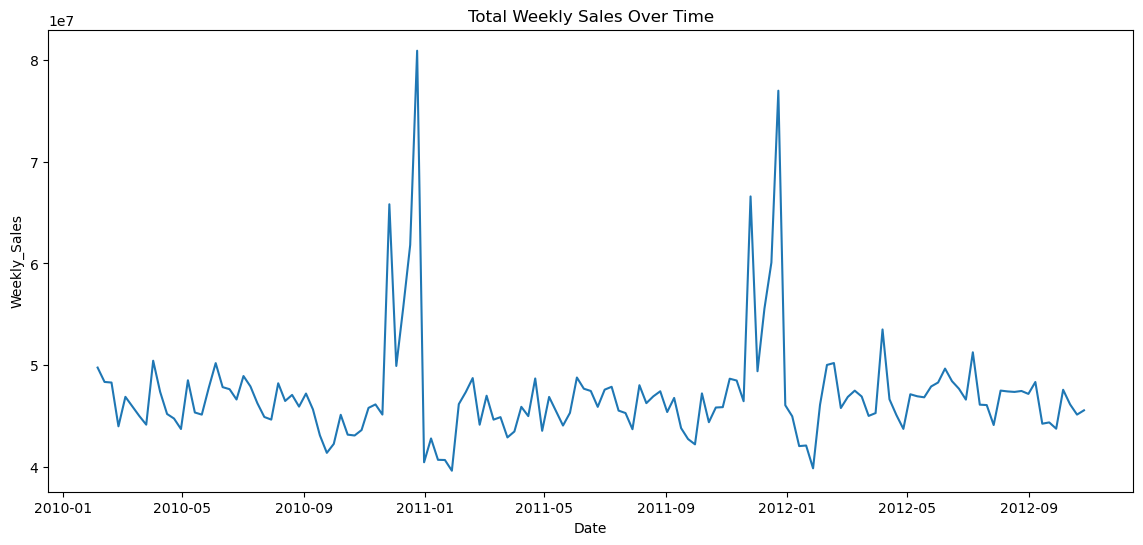

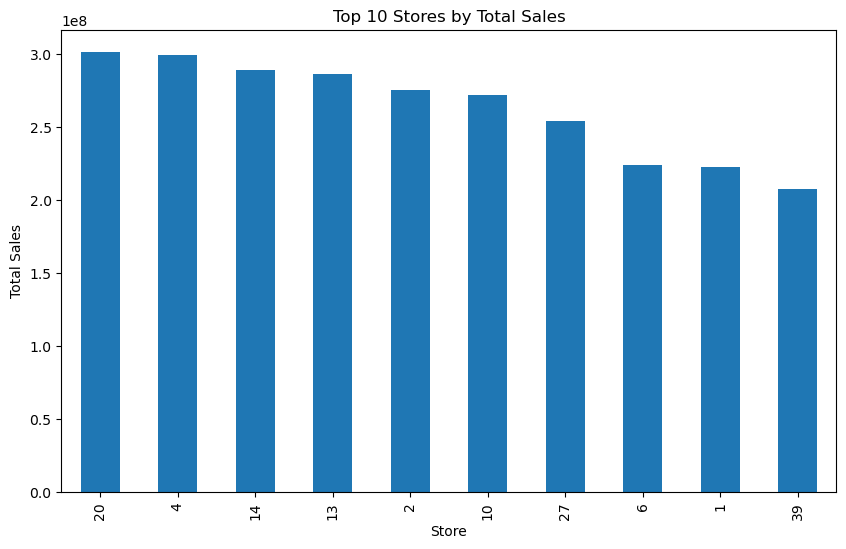

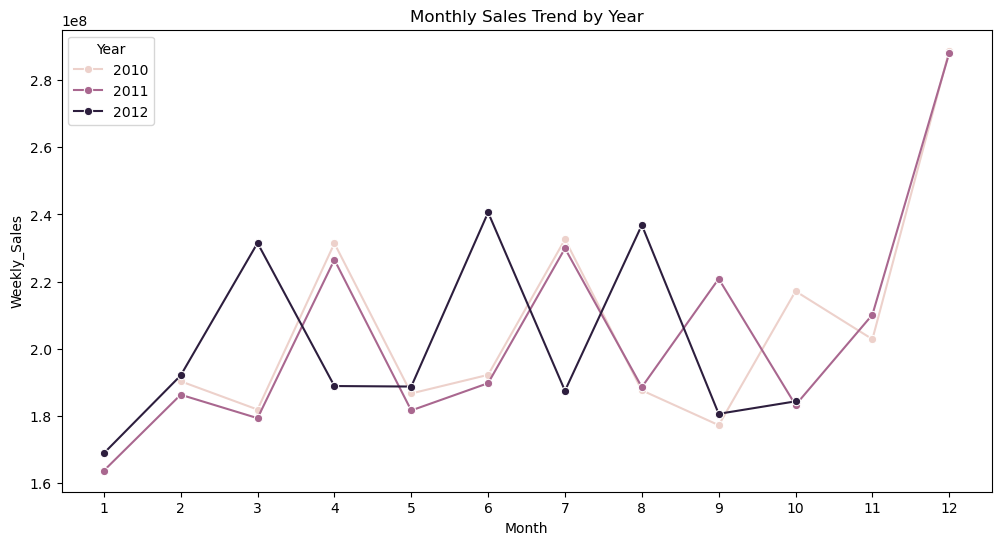

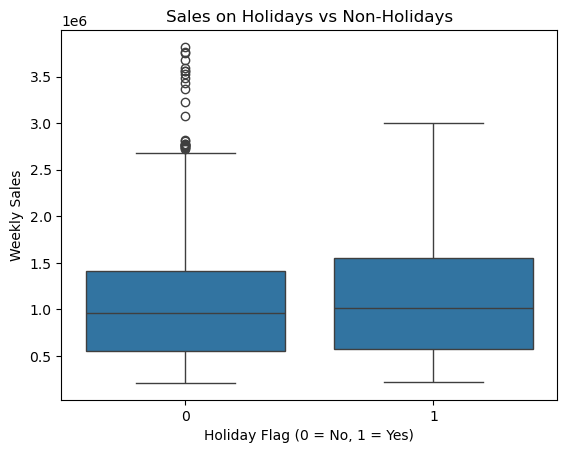

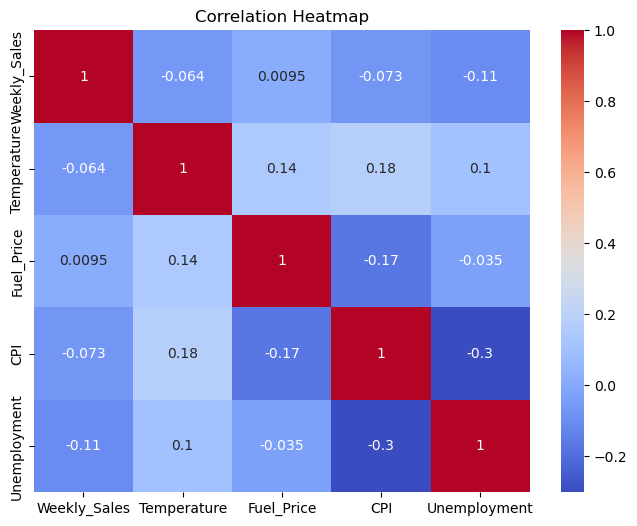

In [32]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Walmart_Sales.csv")
print(df.head())
print(df.info())
df = pd.read_csv(r"C:\Users\USER\Downloads\Walmart_Sales.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
print(df)
print(df.describe())
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=sales_over_time)
plt.title("Total Weekly Sales Over Time")
plt.show()
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

top_stores.plot(kind='bar', figsize=(10,6), title='Top 10 Stores by Total Sales')
plt.ylabel('Total Sales')
plt.show()
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend by Year")
plt.xticks(range(1,13))
plt.show()
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Sales on Holidays vs Non-Holidays')
plt.xlabel('Holiday Flag (0 = No, 1 = Yes)')
plt.ylabel('Weekly Sales')
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
